<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os 
import sys

sys.path.append("../")
# Importamos las clases
# -----------------------------------------------------------------------
from src import soporte_nlp as sn

# Configuración de pandas
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

# para no tener que hacer el restart del codigo todo el rato
# -----------------------------------------------------------------------
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("datos.csv", index_col = 0)
df.head(2)


reviewId                                        reviewDate  \
65115   RXDM4W1ZL7L4L    Reviewed in the United States on June 22, 2021   
56720  R2GINAKQJOSWEL  Reviewed in the United States on August 27, 2021   

            mainDepartment       subDepartment  \
65115  Sports and Outdoors  Outdoor Recreation   
56720            Computers      Men's Clothing   

                                             productName  \
65115  Doctor Developed Copper Wrist Brace / Carpal T...   
56720      Fruit of the Loom Men's Coolzone Boxer Briefs   

                      reviewTitle  reviewStar  \
65115  One size does not fit all.         3.0   
56720   They were ok but thats it         4.0   

                                              reviewText  inconsistentStatus  
65115  Nice lightweight brace but unfortunately was t...                   1  
56720  Boxers were ok. The color did start to fade pr...                   0

In [18]:
df1 = pd.read_csv("datos.csv", index_col = 0)
df1.head(2)

reviewId                                        reviewDate  \
65115   RXDM4W1ZL7L4L    Reviewed in the United States on June 22, 2021   
56720  R2GINAKQJOSWEL  Reviewed in the United States on August 27, 2021   

            mainDepartment       subDepartment  \
65115  Sports and Outdoors  Outdoor Recreation   
56720            Computers      Men's Clothing   

                                             productName  \
65115  Doctor Developed Copper Wrist Brace / Carpal T...   
56720      Fruit of the Loom Men's Coolzone Boxer Briefs   

                      reviewTitle  reviewStar  \
65115  One size does not fit all.         3.0   
56720   They were ok but thats it         4.0   

                                              reviewText  inconsistentStatus  
65115  Nice lightweight brace but unfortunately was t...                   1  
56720  Boxers were ok. The color did start to fade pr...                   0

In [19]:
df1['reviewStar'].mean()

np.float64(3.0035)

In [3]:
df = df[['mainDepartment','reviewText']]


In [4]:

# eliminamos las filas con valores nulos para evitar los problemas
df = df.dropna(subset=['mainDepartment']).reset_index(drop = True)

In [5]:
df

mainDepartment  \
0          Sports and Outdoors   
1                    Computers   
2                    Computers   
3             Home and Kitchen   
4     Beauty and Personal Care   
...                        ...   
9995          Home and Kitchen   
9996       Sports and Outdoors   
9997       Sports and Outdoors   
9998                 Computers   
9999          Home and Kitchen   

                                             reviewText  
0     Nice lightweight brace but unfortunately was t...  
1     Boxers were ok. The color did start to fade pr...  
2     Very easy to install. Worked right away but it...  
3     The color is completely different than hunter ...  
4     From reading the reviews, I was hoping that th...  
...                                                 ...  
9995  This scale is great for food prep. It is fast ...  
9996  Comfortable but a little small.  Rides down on...  
9997  Really great volleyball for the water!! Only p...  
9998                 Good fit and  comfortable to wear.  
9999  These are great pillows, just not for me. They...  

[10000 rows x 2 columns]

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mainDepartment  10000 non-null  object
 1   reviewText      9999 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB
None

Descripción del DataFrame:
                count unique        top  freq
mainDepartment  10000      5  Computers  3071
reviewText       9999   9928       Nice     7

Distribución de clases en la columna 'mainDepartment':
mainDepartment
Computers                   3071
Beauty and Personal Care    2104
Electronics                 1747
Home and Kitchen            1662
Sports and Outdoors         1416
Name: count, dtype: int64


c:\Users\HP\Boot\modulo09-leccion06-nlp-LAB\src\soporte_nlp.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


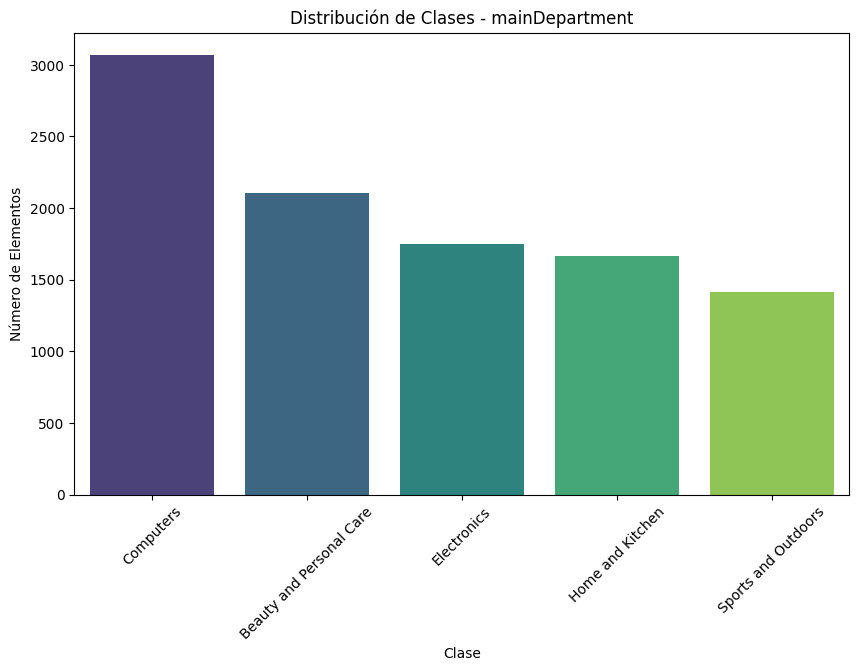

Limpiando el texto...
Texto limpiado y listo.
Generando nubes de palabras...


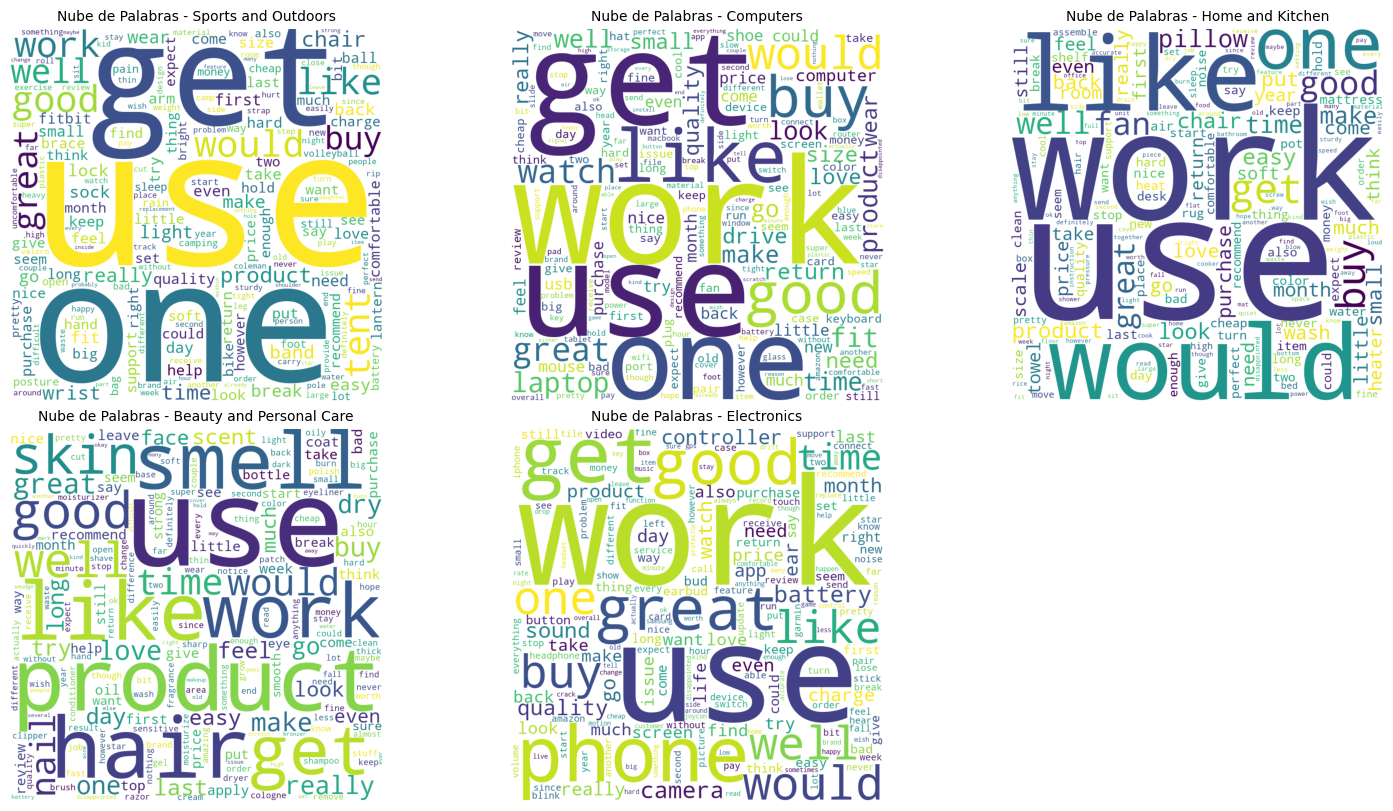

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  
0  nice lightweight brace unfortunately large wri...  
1  boxer ok color start fade pretty quickly becom...  
2  easy install work right away go far expectedit...  
3  color completely different hunter green andor ...  
4  read review hope shampoo conditioner would ext...

In [6]:
# Instanciar la clase con las columnas relevantes
exploracion = sn.ExploracionText(dataframe=df, text_column='reviewText', label_column='mainDepartment', language="english")

# Explorar los datos
exploracion.explorar_datos()

# Limpiar los textos
exploracion.limpiar_textos("cleaned_text")

# Generar nubes de palabras
exploracion.generar_wordclouds()

# Obtener el DataFrame limpio
df_limpio = exploracion.obtener_dataframe_limpio()

# Ver las primeras filas del DataFrame limpio
df_limpio.head()


In [7]:
# instanciamos la clase
representador = sn.RepresentacionTexto(dataframe=df_limpio, text_column='cleaned_text')

# representamos el texto usando  Bag of Words
bow_df = representador.generar_bow()
print("Bag of Words:")
display(bow_df.sample(10))

# representamos el texto usando TF-IDF
tfidf_df = representador.generar_tfidf()
print("TF-IDF:")
display(tfidf_df.sample(10))

# representammos el texto usando  Embeddings
embeddings_df = representador.generar_embeddings()
print("Embeddings:")
display(embeddings_df.sample(10))


Generando Bag of Words...
Bag of Words generado.
Bag of Words:


mainDepartment  \
8605                 Computers   
1135               Electronics   
2761                 Computers   
9521       Sports and Outdoors   
6717               Electronics   
7012  Beauty and Personal Care   
167        Sports and Outdoors   
4445               Electronics   
67                 Electronics   
261                  Computers   

                                             reviewText  \
8605  brought these for my husband to work in for th...   
1135  Good price but takes terrible videos. It’s not...   
2761    Its much larger than my brand new mac book pro.   
9521  I have only had the hair for 6 weeks and it is...   
6717  Like the other reviews, after a few months the...   
7012  So I bought this to try to get my long nails t...   
167                                   Works as intended   
4445  Awesome controller and way better than the sta...   
67               Doesn’t accurately take my heart rate.   
261   Works ok, signal goes in and out,  it all depe...   

                                           cleaned_text  aa  ability  able  \
8605  bring husband work summer first wash start shr...   0        0     0   
1135  good price take terrible video worth time even...   0        0     0   
2761                  much large brand new mac book pro   0        0     0   
9521     hair week already break would recommend anyone   0        0     0   
6717       like review month controller start veer left   0        0     0   
7012  buy try get long nail break within week try na...   0        0     0   
167                                         work intend   0        0     0   
4445  awesome controller way well standard controlle...   0        0     0   
67                           accurately take heart rate   0        0     0   
261                        work ok signal go depend put   0        0     0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
8605         0    0         0           0       0           0          0   
1135         0    0         0           0       0           0          0   
2761         0    0         0           0       0           0          0   
9521         0    0         0           0       0           0          0   
6717         0    0         0           0       0           0          0   
7012         0    0         0           0       0           0          0   
167          0    0         0           0       0           0          0   
4445         0    0         0           0       0           0          0   
67           0    0         0           0       0           0          0   
261          0    0         0           0       0           0          0   

      absurd  abuse  ac  accent  accentuate  accept  acceptable  access  \
8605       0      0   0       0           0       0           0       0   
1135       0      0   0       0           0       0           0       0   
2761       0      0   0       0           0       0           0       0   
9521       0      0   0       0           0       0           0       0   
6717       0      0   0       0           0       0           0       0   
7012       0      0   0       0           0       0           0       0   
167        0      0   0       0           0       0           0       0   
4445       0      0   0       0           0       0           0       0   
67         0      0   0       0           0       0           0       0   
261        0      0   0       0           0       0           0       0   

      accessible  accessory  accident  accidental  accidentally  accidently  \
8605           0          0         0           0             0           0   
1135           0          0         0           0             0           0   
2761           0          0         0           0             0           0   
9521           0          0         0           0             0           0   
6717           0          0         0           0             0           

Generando representación TF-IDF...
Representación TF-IDF generada.
TF-IDF:


mainDepartment  \
7947                 Computers   
9269               Electronics   
8925                 Computers   
9774               Electronics   
7539       Sports and Outdoors   
713           Home and Kitchen   
859   Beauty and Personal Care   
4746  Beauty and Personal Care   
2042          Home and Kitchen   
2866  Beauty and Personal Care   

                                             reviewText  \
7947           Washes and dries differently than denim.   
9269   Work good in Mexico with Tel cell I recommend it   
8925  Washed and worn twice when the jeans slip the ...   
9774  Sd card stopped working, lost 64 gb of picture...   
7539  I ordered this set right before my camping tri...   
713   The chair was great at first, considering the ...   
859   I have been using this product for a month now...   
4746  smells good. Women can wear it too. Its just n...   
2042  Sadly this rug looks better in the ad.  As soo...   
2866                                          Excelente   

                                           cleaned_text   aa  ability  able  \
7947                         wash dry differently denim  0.0      0.0   0.0   
9269                work good mexico tel cell recommend  0.0      0.0   0.0   
8925  wash wear twice jean slip length zipper left f...  0.0      0.0   0.0   
9774  sd card stop work lose gb picture send back tr...  0.0      0.0   0.0   
7539  order set right camping trip arrive time plus ...  0.0      0.0   0.0   
713   chair great first consider price seat cushion ...  0.0      0.0   0.0   
859   use product month still shed hair hair look fu...  0.0      0.0   0.0   
4746                 smell good woman wear strong enuff  0.0      0.0   0.0   
2042  sadly rug look well ad soon walk flatten expec...  0.0      0.0   0.0   
2866                                          excelente  0.0      0.0   0.0   

      abrasive  abs  absolute  absolutely  absorb  absorbency  absorbent  \
7947       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
9269       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
8925       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
9774       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
7539       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
713        0.0  0.0       0.0         0.0     0.0         0.0        0.0   
859        0.0  0.0       0.0         0.0     0.0         0.0        0.0   
4746       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
2042       0.0  0.0       0.0         0.0     0.0         0.0        0.0   
2866       0.0  0.0       0.0         0.0     0.0         0.0        0.0   

      absurd  abuse   ac  accent  accentuate  accept  acceptable  access  \
7947     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
9269     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
8925     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
9774     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
7539     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
713      0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
859      0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
4746     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
2042     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   
2866     0.0    0.0  0.0     0.0         0.0     0.0         0.0     0.0   

      accessible  accessory  accident  accidental  accidentally  accidently  \
7947         0.0        0.0       0.0         0.0           0.0         0.0   
9269         0.0        0.0       0.0         0.0           0.0         0.0   
8925         0.0        0.0       0.0         0.0           0.0         0.0   
9774         0.0        0.0       0.0         0.0           0.0         0.0   
7539         0.0        0.0       0.0         0.0   

Generando embeddings...
Embeddings generados.
Embeddings:


mainDepartment  \
8074  Beauty and Personal Care   
8057          Home and Kitchen   
6778  Beauty and Personal Care   
2466               Electronics   
6070  Beauty and Personal Care   
5292       Sports and Outdoors   
9760  Beauty and Personal Care   
9176  Beauty and Personal Care   
4313       Sports and Outdoors   
7857                 Computers   

                                             reviewText  \
8074  Polish started chipping on day 1. To be fair, ...   
8057  This fan makes a weird rattling noise, as desc...   
6778  I bought this product for stretch marks and I ...   
2466  Very easy set up the Garmin appset everything ...   
6070  You NEED the no wipe top for any of their poli...   
5292         Not good as stated, posture hasn't changed   
9760  I love these little razors. Compact and easy t...   
9176  this smells very good. It is a perfect mix of ...   
4313                                   Doesn’t breathe.   
7857  My phone connects to the WiFi extender but the...   

                                           cleaned_text  embedding_0  \
8074  polish start chip day fair may uv lamp use thi...     0.155689   
8057  fan make weird rattle noise describe review go...     0.257216   
6778  buy product stretch mark say sure oil anything...     0.458028   
2466  easy set garmin appset everything nice see wat...     0.226574   
6070                               need wipe top polish     0.196647   
5292                          good state posture change    -0.051250   
9760  love little razor compact easy store travel ye...     0.243428   
9176  smell good perfect mix note vanilla overwhelmi...     0.157224   
4313                                            breathe     0.396306   
7857   phone connect wifi extender connection recommend     0.166449   

      embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
8074    -0.153922     0.446433    -0.106720     0.408332    -0.394357   
8057    -0.279602     0.692081    -0.013965     0.296864    -0.336732   
6778    -0.012323     0.386125     0.033494     0.727625    -0.052398   
2466    -0.180256     0.690734     0.006025     0.590227    -0.161906   
6070    -0.068907     0.183943     0.262997     0.276723    -0.115728   
5292    -0.103491    -0.274873    -0.011057    -0.175362     0.094671   
9760    -0.129760     0.725479    -0.164804     0.561789     0.104236   
9176    -0.098379     0.692271     0.054525     0.388115    -0.168101   
4313     0.541713    -0.205785    -0.210487    -0.029851    -0.289434   
7857    -0.303402     0.317359     0.244829     0.757012    -0.374978   

      embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
8074     0.273502     0.506102    -0.105107    -0.014659     -0.168650   
8057     0.368599     0.151541     0.129642    -0.134244      0.197368   
6778     0.152638     0.181956     0.062667    -0.261745      0.071452   
2466     0.061793     0.251477    -0.065086    -0.316206     -0.053024   
6070     0.200686     0.006697     0.066664    -0.282294      0.193830   
5292     0.569030     0.114073    -0.160073    -0.487908      0.106489   
9760     0.152588     0.347937    -0.096062    -0.168683      0.360749   
9176     0.375887     0.056323     0.335069    -0.141884      0.347800   
4313     0.594235     0.185284     0.516749    -0.598596     -0.262488   
7857     0.165484     0.259558     0.029091    -0.371600     -0.080054   

      embedding_11  embedding_12  embedding_13  embedding_14  embedding_15  \
8074     -0.254694      0.344146      0.422444     -0.987014      0.286202   
8057     -0.194623      0.111272      0.613689     -0.854686      0.314549   
6778      0.116605      0.346362      0.050294     -0.518638      0.112367   
2466      0.108001     -0.201562      0.145536     -0.174498     -0.003194   
6070      0.233797     -0.006471      0.053478     -0.594635      0.097057   
5292      0.220874      0.144110     -0.298677     -0.265042      0.084046   
9760      0.015285      0.309208 

In [8]:
embeddings_df.shape

(10000, 771)

Aplicando PCA para reducir 768 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


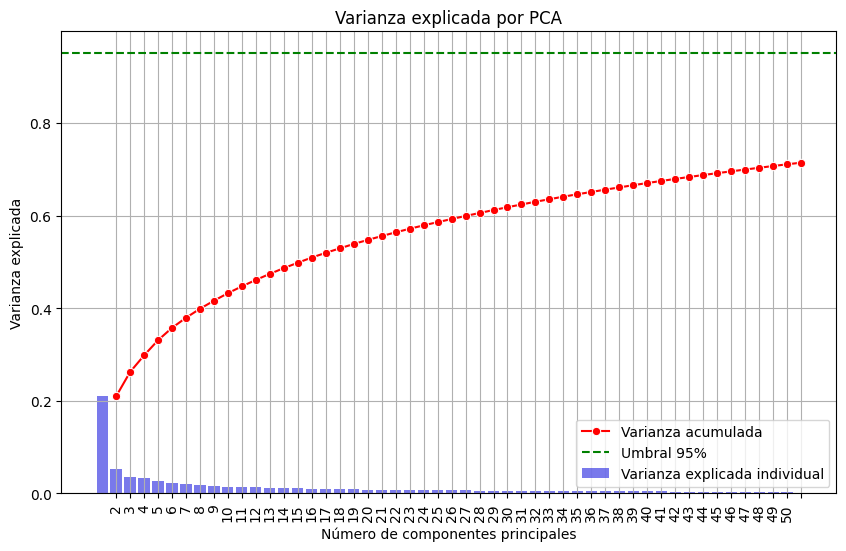

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...          1.738611   
1  boxer ok color start fade pretty quickly becom...          1.355272   
2  easy install work right away go far expectedit...          1.172380   
3  color completely different hunter green andor ...         -0.614810   
4  read review hope shampoo conditioner would ext...          1.649754   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0          0.152096          0.534141          1.832110         -0.816322   
1          0.458492         -0.802558         -0.301389         -0.158522   
2          0.192169          1.661863         -0.464872          0.199373   
3          1.366463          0.033115         -0.170324          0.379125   
4          1.405461         -0.461965          1.296250          1.136927   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -1.244745          1.722020          1.459970          1.009784   
1          0.141087          0.751444         -0.718584          0.725925   
2         -0.554890          0.587701         -0.314332         -0.909666   
3         -0.534526         -1.089790          0.745800         -0.056248   
4          0.547935         -1.269538          0.139595          0.209027   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0          0.882299           0.135578          -0.165954          -0.182332   
1         -0.804344           0.458621          -0.497514          -0.060458   
2          0.361948           1.770641          -0.471117           0.258072   
3         -1.611180           0.816055           0.083503           0.162007   
4         -0.236300           0.056385           0.057113           0.357153   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.251779           0.725212           0.229637           0.080232   
1           0.871171           0.451823           0.104462          -0.301944   
2           0.017059           0.128617           0.044808           0.786050   
3          -0.255736          -0.253314          -0.664981          -0.305911   
4          -0.172052           0.205548           0.094611           0.547622   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0          -0.739866           0.111892           0.207432          -0.426197   
1           0.662372           0.455220          -0.655192          -0.152929   
2           0.389980           0.415541          -0.342177           0.388551   
3           1.304921          -0.739850           0.183743           0.350289   
4           0.340682          -0.071392           0.332725           0.382343   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.433528          -0.001693          -0.401691           0.390502   
1          -0.259620           0.043931           0.539019          -0.709168   
2           0.054832           0.559117           0.136166           0.064887   
3          -0.286538          -1.027641          -0.482453          -1.005213   
4          -0.138290           0.173985          -0.243955          -0.063370   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.242509           0.053073          -0.074080          -0.351965   
1           0.

In [9]:
# Instanciar la clase para reducción de dimensionalidad
reductor_pca = sn.ReduccionDimensionalidadPCA(n_componentes=50)

# Lista de columnas de embeddings a reducir
columnas_embeddings = [f"embedding_{i}" for i in range(768)]

# Aplicar reducción de dimensionalidad
df_reducido_emb = reductor_pca.ajustar_transformar(embeddings_df, columnas_embeddings)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_emb.head()

In [10]:
# Rellenar valores nulos y forzar a tipo texto
df['reviewText'] = df['reviewText'].fillna("").astype(str)

Aplicando PCA para reducir 5000 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


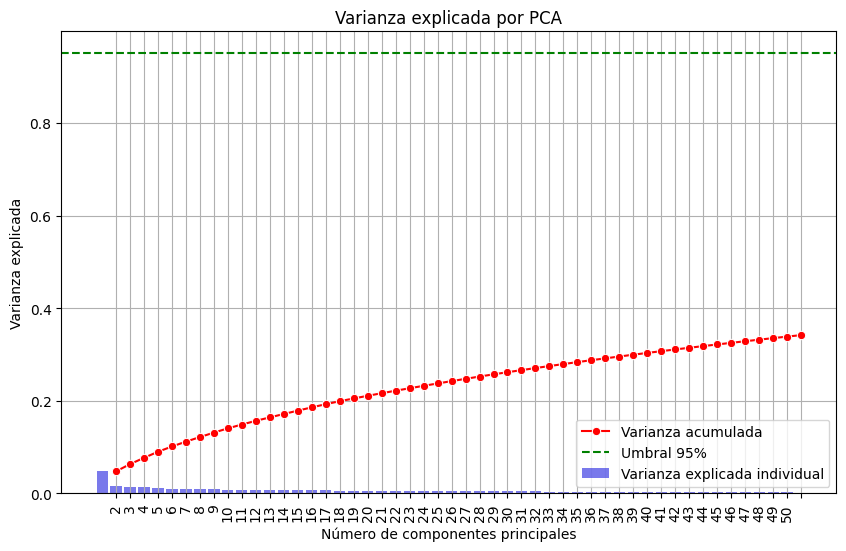

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.565127   
1  boxer ok color start fade pretty quickly becom...         -0.616673   
2  easy install work right away go far expectedit...         -0.155211   
3  color completely different hunter green andor ...         -0.670184   
4  read review hope shampoo conditioner would ext...          0.031709   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.126617         -0.176577          0.016750         -0.053931   
1         -0.027757         -0.181388          0.117718         -0.052351   
2         -0.334501          0.443109          0.339239          0.011901   
3         -0.021858         -0.097109          0.015828         -0.074664   
4         -0.266230          0.678096          0.060007          0.864057   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.017734         -0.142641         -0.104539          0.127782   
1         -0.016774         -0.078111         -0.029637         -0.020350   
2         -0.307124         -0.297066          0.355260         -0.543097   
3         -0.010752          0.004140         -0.122970          0.118829   
4         -0.050473         -0.078285          0.101197          0.474869   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.096027           0.009150           0.230603          -0.050553   
1          0.098384          -0.004658           0.028671           0.003311   
2          0.164773          -0.478384          -0.034455          -0.072764   
3          0.064791           0.039102           0.094197          -0.025609   
4         -0.260220          -0.761877          -0.640924          -0.195762   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.057791          -0.386609          -0.133583          -0.183900   
1           0.154971           0.008948          -0.117396          -0.159160   
2          -0.346943           0.209958          -0.100477          -0.116358   
3          -0.020711          -0.107960          -0.012410          -0.040623   
4           0.294641          -0.592181           0.720174          -0.024859   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.492077           0.136417          -0.088304           0.473154   
1          -0.041873          -0.138063           0.124046           0.061719   
2           0.196546          -0.199009          -0.222792          -0.119842   
3          -0.058164          -0.050314           0.081698          -0.123708   
4          -0.128459           0.116885          -0.070089          -0.097631   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0           0.300087          -0.004849           0.239375           0.143102   
1           0.074765          -0.045649           0.077625          -0.107835   
2          -0.261790          -0.097003          -0.167399          -0.038053   
3          -0.062474          -0.132261           0.112993           0.074144   
4           0.030671          -0.027317          -0.170372          -0.298371   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0          -0.345590          -0.132791           0.332181           0.293741   
1           0.

In [11]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_bow = bow_df.columns.difference(['reviewText', 'mainDepartment', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_bow = reductor_pca.ajustar_transformar(bow_df, columnas_a_reducir_bow)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_bow = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_bow.head()

Aplicando PCA para reducir 5000 dimensiones a 50 dimensiones...
Reducción completada. Nuevas dimensiones agregadas al DataFrame.


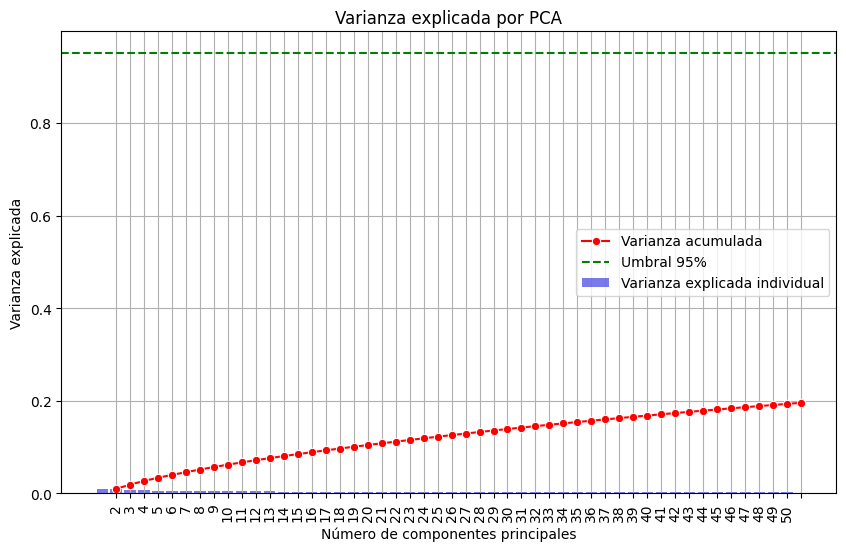

mainDepartment  \
0       Sports and Outdoors   
1                 Computers   
2                 Computers   
3          Home and Kitchen   
4  Beauty and Personal Care   

                                          reviewText  \
0  Nice lightweight brace but unfortunately was t...   
1  Boxers were ok. The color did start to fade pr...   
2  Very easy to install. Worked right away but it...   
3  The color is completely different than hunter ...   
4  From reading the reviews, I was hoping that th...   

                                        cleaned_text  pca_componente_0  \
0  nice lightweight brace unfortunately large wri...         -0.072775   
1  boxer ok color start fade pretty quickly becom...         -0.047273   
2  easy install work right away go far expectedit...          0.098815   
3  color completely different hunter green andor ...         -0.039114   
4  read review hope shampoo conditioner would ext...          0.067081   

   pca_componente_1  pca_componente_2  pca_componente_3  pca_componente_4  \
0         -0.048525         -0.003397         -0.117299          0.064432   
1          0.004796          0.015612         -0.048556          0.014823   
2          0.183000         -0.097055          0.003219         -0.066586   
3         -0.037840          0.002516         -0.032798          0.026607   
4         -0.029714         -0.061520          0.051501          0.033757   

   pca_componente_5  pca_componente_6  pca_componente_7  pca_componente_8  \
0         -0.032330          0.088922          0.122723          0.106585   
1          0.008476         -0.017056         -0.018487          0.041375   
2          0.104101         -0.070214          0.117519          0.031219   
3          0.022202         -0.011019         -0.013229          0.030331   
4         -0.031848          0.012448          0.039421         -0.033115   

   pca_componente_9  pca_componente_10  pca_componente_11  pca_componente_12  \
0         -0.045991          -0.087970           0.092120           0.043605   
1          0.046524          -0.014000          -0.059600          -0.019615   
2         -0.002073          -0.001787          -0.112279          -0.023842   
3          0.022170          -0.019225          -0.039906          -0.002535   
4          0.162248           0.060825           0.034257           0.162032   

   pca_componente_13  pca_componente_14  pca_componente_15  pca_componente_16  \
0           0.009544          -0.028730          -0.021150           0.019666   
1           0.056573           0.035603           0.004732          -0.011206   
2           0.001139          -0.085757          -0.007336          -0.007309   
3          -0.021253           0.026294           0.014602          -0.015230   
4          -0.005423           0.026968          -0.024061           0.021325   

   pca_componente_17  pca_componente_18  pca_componente_19  pca_componente_20  \
0           0.008322          -0.011874           0.013980          -0.001599   
1          -0.033969          -0.006548          -0.008347          -0.063257   
2          -0.168673           0.012286           0.173602           0.022656   
3           0.022199          -0.012275          -0.022769          -0.017369   
4          -0.014409           0.079925          -0.005196          -0.015230   

   pca_componente_21  pca_componente_22  pca_componente_23  pca_componente_24  \
0          -0.053598           0.007776          -0.018882          -0.011323   
1           0.017032           0.260197           0.076535           0.107529   
2           0.103903          -0.029948          -0.051687          -0.122904   
3           0.033381          -0.011203           0.009375          -0.039252   
4          -0.014209          -0.006681           0.015221           0.000785   

   pca_componente_25  pca_componente_26  pca_componente_27  pca_componente_28  \
0           0.017215           0.030820           0.018318           0.001158   
1          -0.

In [12]:
# Seleccionar columnas numéricas para reducir
columnas_a_reducir_tf = bow_df.columns.difference(['reviewText', 'mainDepartment', 'cleaned_text'])


# Aplicar reducción de dimensionalidad
df_reducido_tf = reductor_pca.ajustar_transformar(tfidf_df, columnas_a_reducir_tf)

# Mostrar la varianza explicada por los componentes principales
varianza_acumulada_tf = reductor_pca.explicar_varianza(mostrar_grafico=True)

# El DataFrame 'df_reducido' contiene las nuevas columnas reducidas como 'pca_componente_0', ..., 'pca_componente_49'
df_reducido_tf.head()

In [13]:
# Crear un diccionario de mapeo
valores_unicos = df_reducido_emb['mainDepartment'].unique()
mapear_status = {value: i for i, value in enumerate(valores_unicos)}
df_reducido_emb["mainDepartment"] = df_reducido_emb["mainDepartment"].map(mapear_status)

X = df_reducido_emb.iloc[:, 3:]
y = df_reducido_emb["mainDepartment"]

In [14]:
clasificador = sn.ClasificacionTextoAvanzada(modelo="random_forest")

X_train, X_test, y_train, y_test = clasificador.dividir_datos(X, y, test_size=0.3)

# Entrenamiento
clasificador.entrenar(X_train, y_train)

# Validación cruzada
clasificador.validar(X_train, y_train)

parametros = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

clasificador.ajustar_hyperparametros(X_train, y_train, parametros)


Dividiendo datos: 30.0% para prueba.
Tamaño del conjunto de entrenamiento: 7000
Tamaño del conjunto de prueba: 3000
Entrenando modelo...
Modelo entrenado.
Realizando validación cruzada...
Puntuaciones de validación cruzada: [0.55802277 0.55846892 0.55479117 0.56488659 0.54753198]
Puntuación media: 0.5567
Buscando los mejores hiperparámetros...
Mejores parámetros encontrados: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Modelo actualizado con los mejores parámetros.


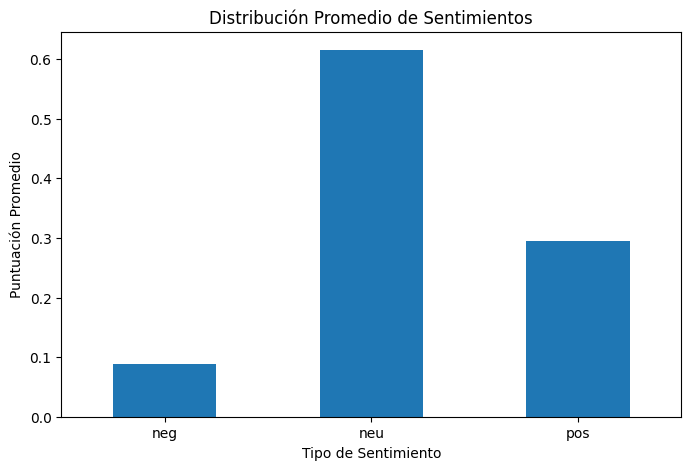

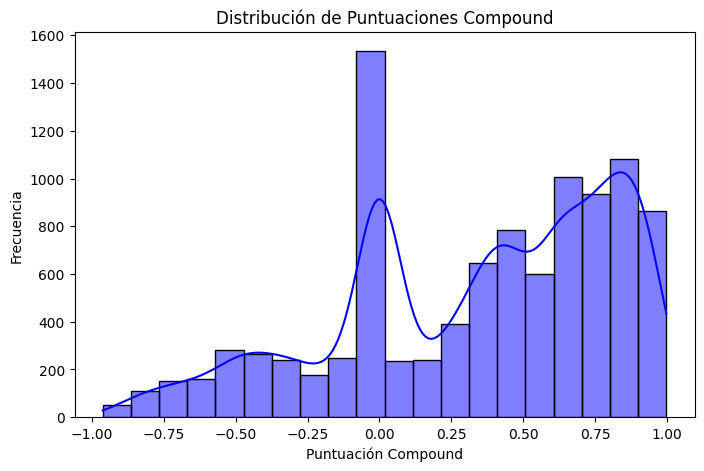

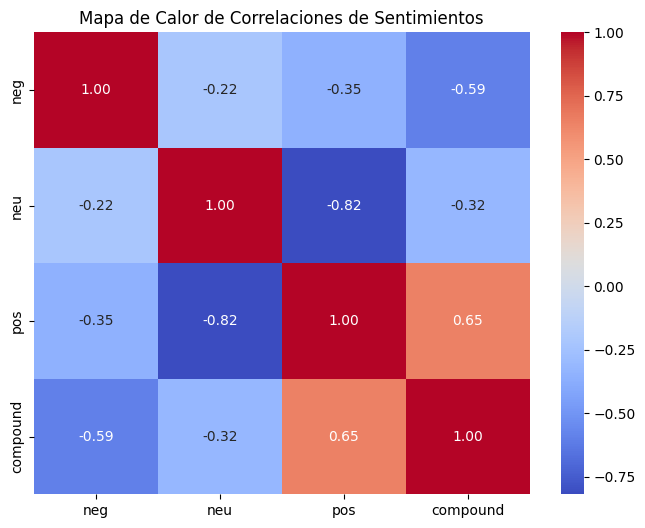

In [15]:
# Instanciar la clase
analisis_sentimientos = sn.AnalisisSentimientos(df_limpio, columna_texto='cleaned_text')

# Generar gráficos
analisis_sentimientos.graficar_distribucion_sentimientos()
analisis_sentimientos.graficar_distribucion_compound()
analisis_sentimientos.graficar_mapa_calor_sentimientos()

In [22]:
analisis_sentimientos.obtener_resumen()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


neg    neu    pos  compound
0     0.121  0.603  0.276    0.4767
1     0.138  0.539  0.323    0.4767
2     0.000  0.523  0.477    0.8020
3     0.000  1.000  0.000    0.0000
4     0.000  0.541  0.459    0.8979
...     ...    ...    ...       ...
9995  0.000  0.403  0.597    0.9501
9996  0.000  0.602  0.398    0.5106
9997  0.226  0.419  0.355    0.4754
9998  0.000  0.103  0.897    0.8271
9999  0.000  0.503  0.497    0.8709

[10000 rows x 4 columns]